# KNN From Scratch

In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import copy

# import KNN from knn.py
from knn import KNN

## Step 1: Import dataset

Dataset complete info: https://archive.ics.uci.edu/ml/machine-learning-databases/car/

## Attribute Information:

Class Values:

unacc, acc, good, vgood

Attributes:

1. buying: vhigh, high, med, low.
2. maint: vhigh, high, med, low.
3. doors: 2, 3, 4, 5more.
4. persons: 2, 4, more.
5. lug_boot: small, med, big.
6. safety: low, med, high.


In [2]:
#load to dataframe
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns =["buying","maint","doors","persons","lug_boot","safety","class"]
df = pd.read_csv(path, index_col=False, header=None, names=columns)

print('Original Dataset')
print(df.head())

# Transform categorical variables (except the target) into one-hot encoding
df = pd.get_dummies(df,columns=df.columns.values[:-1])

#transform the target into numeric codes
labelencoder= LabelEncoder()
df["class"] = labelencoder.fit_transform(df["class"])

# #inspect the head
print('\nProcessed Dataset')
print(df.head())


# However 

Original Dataset
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

Processed Dataset
   class  buying_high  buying_low  buying_med  buying_vhigh  maint_high  \
0      2            0           0           0             1           0   
1      2            0           0           0             1           0   
2      2            0           0           0             1           0   
3      2            0           0           0             1           0   
4      2            0           0           0             1           0   

   maint_low  maint_med  maint_vhigh  doors_2  ...  doors_5more  persons_2  \
0          0          0            1        1  ...            0          1   
1          0          0            1   

## Load your data into X and y

In [3]:
X,y = df.drop('class',axis=1).values, df["class"].values
# X,y = make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)

## Plot X (Use this is X has 2-dimension)

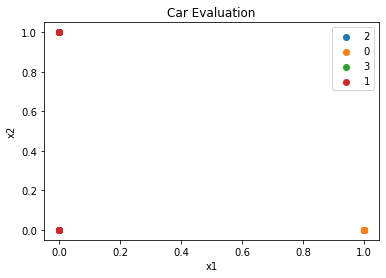

In [4]:
KNN().make_plot(y,X,'Car Evaluation')

## Define train test split

In [5]:
train_X, test_X, y_train, y_test = train_test_split(X,y,test_size=.2,stratify=y,random_state=0)

## Normalize the dataset

In [6]:
scalar = StandardScaler()
Xfit = scalar.fit(train_X)
X_train = Xfit.transform(train_X)
X_test = Xfit.transform(test_X)

## Fit the model

In [7]:
model = KNN().fit(X_train, y_train)

## Compute Accuracy

In [8]:
Train_pred_y = model.predict(X_train)
Test_pred_y = model.predict(X_test)

print('Train Accuracy {:0.2f}%'.format( model.evaluate(y_train,Train_pred_y)*100 ))
print('Test Accuracy {:0.2f}%'.format( model.evaluate(y_test,Test_pred_y)*100 ))

Train Accuracy 91.10%
Test Accuracy 71.68%


## Search for best k

In [9]:
max_k = int(np.sqrt(X_train.shape[0]))
print('Maximum k: '+str(max_k)+ '\n\nIterations\n'+'='*45+'\n') 

best_model = None
best_test_accuracy = 0
train,test = [],[]
all_k = range(1,max_k,2)

for k in all_k:

    #fit model
    model = KNN(k).fit(X_train, y_train)

    #predict train and test
    Train_pred_y = model.predict(X_train)
    Test_pred_y = model.predict(X_test)
    Train_pred_y = model.evaluate(y_train,Train_pred_y)*100
    Test_pred_y = model.evaluate(y_test,Test_pred_y)*100

    #add to lists
    train.append(Train_pred_y)
    test.append(Test_pred_y)

    #get best model
    if Test_pred_y > best_test_accuracy:
        best_test_accuracy = Test_pred_y
        best_model = copy.deepcopy(model)
    print('Train Accuracy: {:0.2f}%\tTest Accuracy: {:0.2f}%'.format( Train_pred_y, Test_pred_y ))

print('Best k: ',best_model.k)

Maximum k: 37

Iterations

Train Accuracy: 100.00%	Test Accuracy: 76.59%
Train Accuracy: 91.10%	Test Accuracy: 71.68%
Train Accuracy: 93.42%	Test Accuracy: 82.08%
Train Accuracy: 91.68%	Test Accuracy: 85.84%
Train Accuracy: 94.65%	Test Accuracy: 89.88%
Train Accuracy: 95.37%	Test Accuracy: 90.46%
Train Accuracy: 94.65%	Test Accuracy: 90.17%
Train Accuracy: 93.27%	Test Accuracy: 89.02%
Train Accuracy: 90.74%	Test Accuracy: 85.55%
Train Accuracy: 89.36%	Test Accuracy: 83.82%
Train Accuracy: 87.12%	Test Accuracy: 80.92%
Train Accuracy: 85.82%	Test Accuracy: 80.06%
Train Accuracy: 83.72%	Test Accuracy: 78.90%
Train Accuracy: 81.98%	Test Accuracy: 77.17%
Train Accuracy: 79.67%	Test Accuracy: 76.30%
Train Accuracy: 78.80%	Test Accuracy: 74.86%
Train Accuracy: 78.22%	Test Accuracy: 75.43%
Train Accuracy: 78.08%	Test Accuracy: 75.72%
Best k:  11


## Plot Accuracy curve

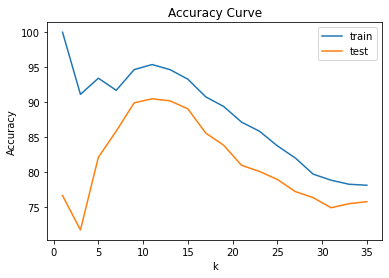

In [10]:
plt.plot(all_k,train,label='train')
plt.plot(all_k,test,label='test')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

## Single value prediction with best model

In [11]:
features = test_X[0].reshape(1, -1)

features_norm = Xfit.transform(features)
y_pred = best_model.predict(features_norm)

print(features, y_pred)

[[0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0]] [2]
